In [ ]:
#기본적인 패키지 가져오기
import pandas as pd
import numpy as np
import tensorflow
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터 로드
data = pd.read_excel('/content/drive/MyDrive/Dobbys/data.xlsx')

In [ ]:
#데이터 체킹 -> 컬럼 중 필요 없는 거 삭제 작업 진행
data.head()

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0


In [ ]:
#데이터 중 실질적으로 필요한 것만 추출 -> 다양한 방법을 통하여 할 수 있음
data = data[['Sentence', 'Emotion']]

In [ ]:
#데이터 체킹
data.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포


In [ ]:
#타겟 값 확인 -> 한글로 되어 있음 -> 숫자 코딩 필요
print(np.unique(data['Emotion'], return_counts = True))

(array(['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오'], dtype=object), array([5468, 5898, 5665, 5267, 4830, 6037, 5429]))


In [ ]:
#숫자로 바꾸는 함수 생성
def emotion(x):
  if x == '공포':
    return 0
  elif x == '놀람':
    return 1
  elif x == '분노':
    return 2
  elif x == '슬픔':
    return 3
  elif x == '중립':
    return 4
  elif x =='행복':
    return 5
  elif x =='혐오':
    return 6

In [ ]:
#타겟 값을 숫자화
data['Emotion'] = data['Emotion'].apply(emotion)

In [ ]:
#데이터 체킹 -> 제대로 변환 되었음
data.head(5)

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,0
1,그냥 내 느낌일뿐겠지?,0
2,아직너무초기라서 그런거죠?,0
3,유치원버스 사고 낫다던데,0
4,근데 원래이런거맞나요,0


In [ ]:
#물음표 등 문장부호 삭제 필요
import string
data['Sentence'] = data['Sentence'].apply(lambda x : ''.join([k for k in x if k not in string.punctuation]))

#타겟 값과 결합
data = pd.concat([data['Emotion'], data['Sentence']], axis = 1)

In [ ]:
data

,Emotion,Sentence
0,0,언니 동생으로 부르는게 맞는 일인가요
1,0,그냥 내 느낌일뿐겠지
2,0,아직너무초기라서 그런거죠
3,0,유치원버스 사고 낫다던데
4,0,근데 원래이런거맞나요
...,...,...
38589,6,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라
38590,6,재미가 없으니 망하지
38591,6,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...
38592,6,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ


In [ ]:
data.head(5)

,Emotion,Sentence
0,0,언니 동생으로 부르는게 맞는 일인가요
1,0,그냥 내 느낌일뿐겠지
2,0,아직너무초기라서 그런거죠
3,0,유치원버스 사고 낫다던데
4,0,근데 원래이런거맞나요


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


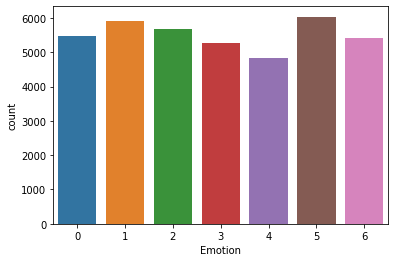

In [ ]:
#타겟 값 분포 확인 완료 -> 어느정도 고르게 분포되어 있음
sns.countplot(data['Emotion'])

# konlpy, soynlp 등 한국어 자연어 처리를 위한 패키지에 대하여 사전 공부 **필수**

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#형태소 분석기 중 Okt 활용 토크나이징 작업 실시 -> morphs : 형태소 추출, stem : 어간추출
from konlpy.tag import Okt

okt = Okt()

data_text = []
for i in range(len(data['Sentence'])):
  data_text_preprocession = okt.morphs(data['Sentence'][i], stem = True)
  data_text.append(data_text_preprocession)

In [ ]:
#추출된 데이터 확인 -> 물음표, 온점 등 punctuation 삭제 필요
data_text[0:5]

[['언니', '동생', '으로', '부르다', '맞다', '일', '인가요'],
 ['그냥', '내', '느낌', '일', '뿐', '겠다'],
 ['아직', '너무', '초기', '라서', '그런', '거', '죠'],
 ['유치원', '버스', '사고', '낫다'],
 ['근데', '원래', '이렇다', '맞다']]

text의 최대 길이 : 299
text의 평균 길이 : 22.158496139296265


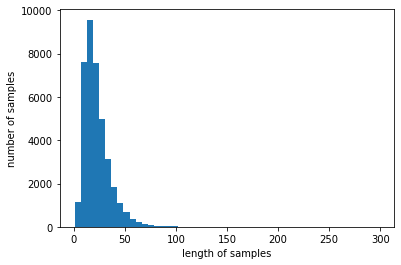

In [ ]:
#문장길이 확인 작업 실시 : 문장길이가 다르면 학습이 안되기에 평균 길이를 본 후 패딩 작업 실시
print('text의 최대 길이 :',max(len(x) for x in data['Sentence']))
print('text의 평균 길이 :',sum(map(len, data['Sentence']))/len(data['Sentence']))
plt.hist([len(x) for x in data['Sentence']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
#필요한 패키지 임포트 : 문장길이를 맞추는데 사용하는 패딩 및 단어를 숫자화 하는 모듈 등
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_text)

In [ ]:
#단어사전 크기
len(tokenizer.word_index)

24133

In [ ]:
#토크나이징 작업 실시
tokenizer = Tokenizer(24133)
tokenizer.fit_on_texts(data_text)
data_input = tokenizer.texts_to_sequences(data_text)

In [ ]:
#토큰화 -> 정수화 잘되었는지 확인
data_input[0:3]

[[829, 1048, 21, 676, 93, 68, 392],
 [79, 60, 527, 68, 397, 453],
 [245, 25, 3360, 916, 492, 58, 380]]

In [ ]:
#패딩 작업 실시
data_ipnut_sequence = pad_sequences(data_input, maxlen=20)

In [ ]:
#패딩 작업 결과 체킹
data_ipnut_sequence[0:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  829, 1048,   21,  676,   93,   68,  392],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   79,   60,  527,   68,  397,  453],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  245,   25, 3360,  916,  492,   58,  380]],
      dtype=int32)

In [ ]:
#텐서플로우 케라스의 인풋은 텐소 or 넘파이 배열을 받는다 따라서 변환 작업 실시
data_target = np.array(data['Emotion'])

In [ ]:
#데이터 분할을 위한 패키지 임포트 및 분할 작업 실시, stratify 파라미터를 활용하여, 층화 추출을 통해 데이터가 타겟 값별로 고르게 분포하도록 해야함
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data_ipnut_sequence, data_target, stratify = data_target,
                                                                      test_size = 0.2,
                                                                      random_state = 1234)

In [ ]:
#임베딩층, 덴스 등 레이어 구축을 위한 패키지 임포트
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential

In [ ]:
#모델 구축, 임베딩 층은 30차원, 레이어는 5개, GRU 활용(GRU는 LSTM과 비슷한 원리로 작동되며 성능도 비슷하지만 학습소요시간이 짧은 장점을 가짐)
#마지막 레이어는 다중분류이기에 소프트 맥스 activation function 활용
em_dim = 30

model_sementic = Sequential()

model_sementic.add(Embedding(24133, em_dim))
model_sementic.add(GRU(512, return_sequences=True))
model_sementic.add(GRU(256, return_sequences=True))
model_sementic.add(GRU(128, return_sequences=True))
model_sementic.add(GRU(64, return_sequences=True))
model_sementic.add(GRU(32, return_sequences=False))
model_sementic.add(Dense(7, activation='Softmax'))

In [ ]:
#모델 컴파일, 컴파일 시, 얼리스탑 및 콜백 등을 통하여 가중치 저장, 과적합 방지등을 진행할 수 있음
#본 실습에서는 딥러닝 활용 워크 플로우를 보여주기 위하여 생략
model_sementic.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
#모델 학습 실시, hist로 저장 해두면 검증 세트와 훈련세트의 과정을 시각화 할 수 있음, verbose = 1은 훈련과정을 표기함
hist = model_sementic.fit(train_input,train_target, epochs = 30, batch_size = 32, validation_split = 0.2 ,verbose = 1)

Epoch 1/30
772/772 [==============================] - 31s 17ms/step - loss: 1.6623 - acc: 0.3221 - val_loss: 1.5136 - val_acc: 0.4071
Epoch 2/30
772/772 [==============================] - 11s 14ms/step - loss: 1.3319 - acc: 0.4709 - val_loss: 1.4321 - val_acc: 0.4338
Epoch 3/30
772/772 [==============================] - 11s 14ms/step - loss: 1.0915 - acc: 0.5738 - val_loss: 1.4934 - val_acc: 0.4266
Epoch 4/30
772/772 [==============================] - 11s 14ms/step - loss: 0.8918 - acc: 0.6650 - val_loss: 1.6196 - val_acc: 0.4317
Epoch 5/30
772/772 [==============================] - 11s 14ms/step - loss: 0.7183 - acc: 0.7392 - val_loss: 1.7888 - val_acc: 0.4186
Epoch 6/30
772/772 [==============================] - 11s 15ms/step - loss: 0.5798 - acc: 0.7980 - val_loss: 1.9940 - val_acc: 0.4042
Epoch 7/30
772/772 [==============================] - 13s 16ms/step - loss: 0.4615 - acc: 0.8453 - val_loss: 2.1128 - val_acc: 0.4096
Epoch 8/30
772/772 [==============================] - 11s 14ms

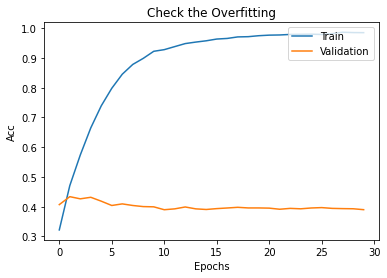

In [ ]:
#훈련과정 시각화 (정확도 기준)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Check the Overfitting')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

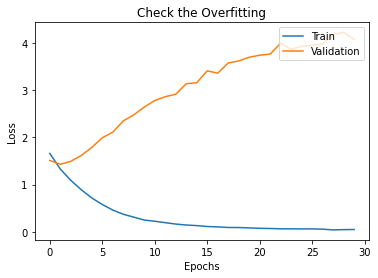

In [ ]:
#훈련과정 시각화 (손실 기준)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Check the Overfitting')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

In [ ]:
print("\n 테스트 정확도: %.4f" % (model_sementic.evaluate(test_input, test_target)[1]))

242/242 [==============================] - 1s 6ms/step - loss: 4.0651 - acc: 0.3823

 테스트 정확도: 0.3823


보통 감성분석을 진행하는 데이터는 NSMC(Naver Sementic Movie Comment)로 진행을 하는데 이번에는 NIA에서 공개한 데이터(**한국어 감정 정보가 포함된 단발성 대화 데이터셋**)를 활용하였습니다. 보통 NSMC로 진행하였을 때는 이진분류이며 데이터 양도 많아서 모델 성능이 높게 나오는데. 현재 진행한 실습에서는 생각보다 모델 결과 값이 실망스럽다. 배치정규화 등을 통해서 성능을 더 높일수는 있지만 근본적인 원인은 따로 있다고 생각이 들었다. 그 이유로는 개인적으로 생각했을 때 데이터 양의 문제라기 보다는 데이터 품질의 문제이다!
보시는 것 처럼 공포라는 라벨링에 맞지 않는 데이터이며 오히려 2번째 문장은 중립에 맞지 않을 까? 하는 생각이 드네요... 라벨링을 다시해서 진행한다면 지금 모델의 성능보다 더 좋은 값을 도출할 수 있을거라 생각이 든다.




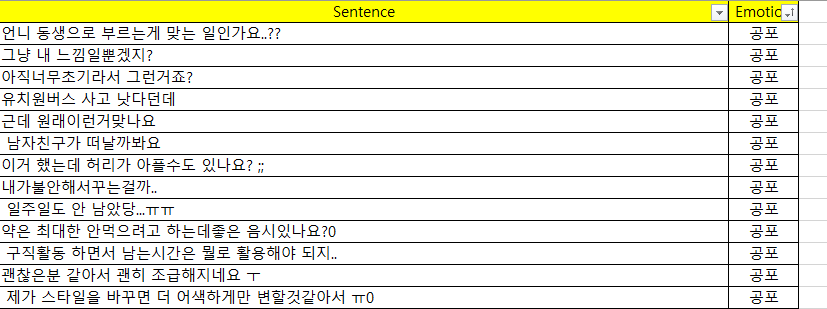